In [1]:
import tensorflow
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
(X_train,Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train_reshape = X_train.reshape(60000,28, 28,1)

In [8]:
X_test_reshape = X_test.reshape(10000,28,28,1)

In [9]:
X_train_reshape.shape

(60000, 28, 28, 1)

In [11]:
X_train_resize = tensorflow.image.resize(X_train_reshape, [32,32]) # Because LeNet 5 takes input image of size 32*32.

In [12]:
X_train_resize.shape

TensorShape([60000, 32, 32, 1])

In [13]:
X_test_resize = tensorflow.image.resize(X_test_reshape,[32,32])

In [14]:
X_test_resize.shape

TensorShape([10000, 32, 32, 1])

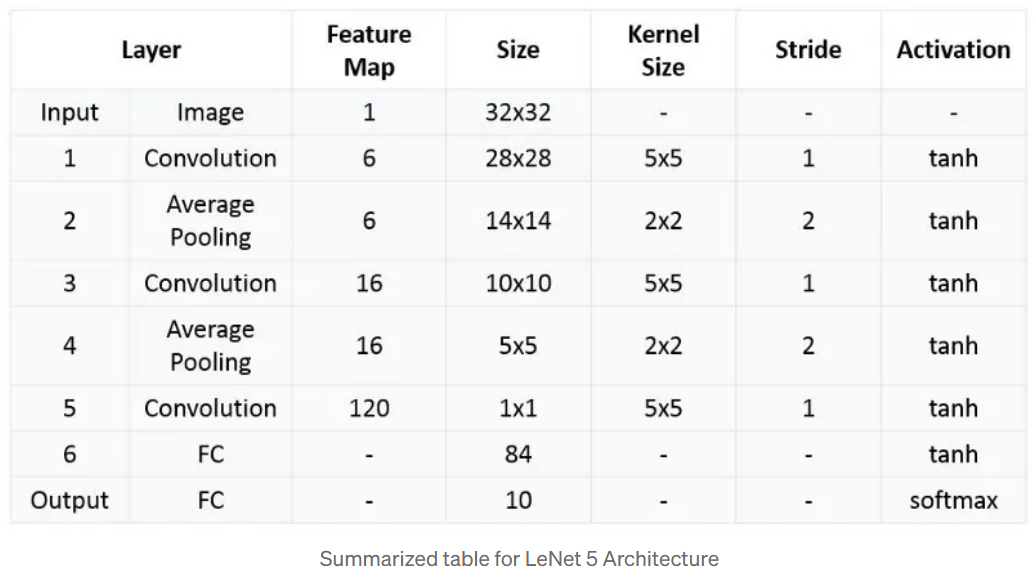

In [16]:
model = keras.Sequential([

    keras.layers.Conv2D(6, (5,5), input_shape=(32,32,1),strides=(1,1), activation='tanh'), #ConvLayer1
    keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)), #PoolingLayer1

    keras.layers.Conv2D(16,(5,5),strides=(1,1), activation='tanh'), #ConvLayer2
    keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)), #PoolingLayer2

    keras.layers.Conv2D(120,(5,5),strides=(1,1), activation='tanh'),#ConvLayer3


    keras.layers.Flatten(),# Flatten to the FeatureMap

    keras.layers.Dense(84, activation='tanh'),#FullyConnectedLayer1
    keras.layers.Dense(10, activation='softmax')#FullyConnectedLayer2/OutputLayer

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.fit(X_train_resize,Y_train, epochs=5,batch_size=100)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 56ms/step - accuracy: 0.8973 - loss: 0.3725
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.9813 - loss: 0.0614
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9856 - loss: 0.0469
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9881 - loss: 0.0359
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9911 - loss: 0.0283


In [25]:
model.evaluate(X_test_resize,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9825 - loss: 0.0535


[0.04285264015197754, 0.986299991607666]